In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
rawData = pd.read_csv('Google_hangouts_removeBadPackets.csv')

In [83]:
#print(rawData)
print("(rows,columns):",rawData.shape)

(rows,columns): (54255, 87)


In [16]:
# Get np array by columns
X = rawData.iloc[:,:86].values
Y = rawData.iloc[:,86].values.reshape((rawData.shape[0],1))
m = rawData.shape[0]
# Total length of flow in both direction
X_total_length_flow = np.array(rawData.loc[:,['TotLen Fwd Pkts','TotLen Bwd Pkts','Category']])
# Category and AppProtocol
X_category_AppProtocol = np.array(rawData.loc[:,['Category','App_protocol']])
# 5 tuples (IP,Port,Protocol)
X_five_tuples = np.array(rawData.loc[:,['Src IP','Src Port','Dst IP','Dst Port','Protocol']])
# Src IP and Dst IP
X_src_dst_IP = np.array(rawData.loc[:,['Src IP','Dst IP']])
#print(X_category_AppProtocol[np.where(X_category_AppProtocol[:,0] == 'Web')])

#Scr IP, Dst IP, Category, App Protocol, Web Service
X_ip_label = np.array(rawData.loc[:,['Src IP','Dst IP','Category','App_protocol','Web_service']])

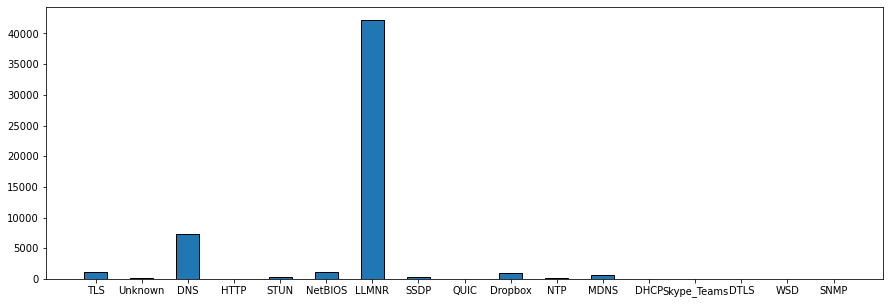

In [5]:
# plot App_protocol
X_AppProtocol = X_category_AppProtocol[:,1].reshape(m,1)
X_appProtocol_labels = np.unique(X_AppProtocol)
fig, ax = plt.subplots(figsize=(15,5))

ax.hist(X_AppProtocol,rwidth=0.5,bins=np.arange(-0.5,len(X_appProtocol_labels)),edgecolor='black')

plt.show()

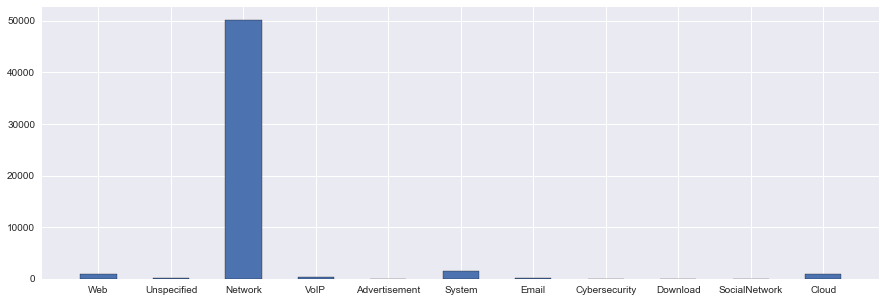

In [29]:
# plot category
plt.style.use('seaborn')

X_category = X_category_AppProtocol[:,0]
X_category = X_category.reshape(X_category.shape[0],1)
x_category_labels = np.unique(X_category)

fig, ax = plt.subplots(figsize=(15,5))

ax.hist(X_category,rwidth=0.5,bins=np.arange(-0.5,len(x_category_labels)),edgecolor='black')

plt.show()

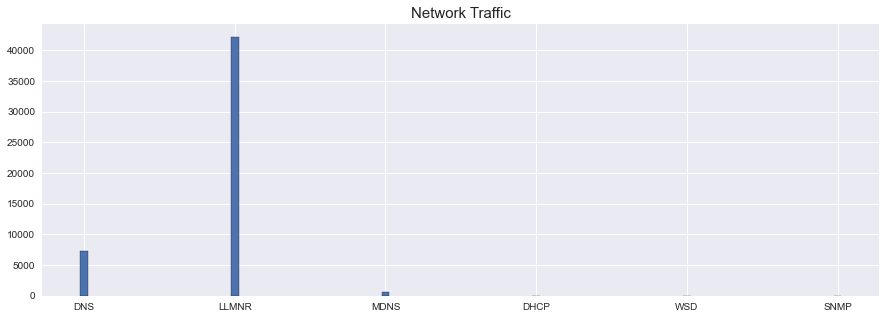

In [7]:
# plot what app protocols the network traffic use
x_network_appProtocol = X_category_AppProtocol[np.where(X_category_AppProtocol[:,0] == 'Network')]
x_network_appProtocol = x_network_appProtocol[:,1]
x_network_appProtocol = x_network_appProtocol.reshape(x_network_appProtocol.shape[0],1)
x_network_app_labels = np.unique(x_network_appProtocol)



fig, ax = plt.subplots(figsize=(15,5))

ax.hist(x_network_appProtocol,rwidth=0.05,bins=np.arange(-0.5,len(x_network_app_labels)),edgecolor='black')
ax.set_title("Network Traffic",fontsize=15)
plt.show()

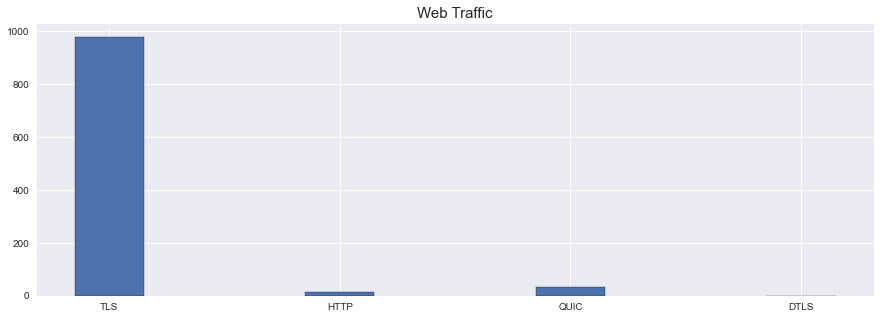

In [8]:
# plot what app protocols the web traffic use
x_network_appProtocol = X_category_AppProtocol[np.where(X_category_AppProtocol[:,0] == 'Web')]
x_network_appProtocol = x_network_appProtocol[:,1]
x_network_appProtocol = x_network_appProtocol.reshape(x_network_appProtocol.shape[0],1)
x_network_app_labels = np.unique(x_network_appProtocol)


fig, ax = plt.subplots(figsize=(15,5))

ax.hist(x_network_appProtocol,rwidth=0.3,bins=np.arange(-0.5,len(x_network_app_labels)),edgecolor='black')
ax.set_title("Web Traffic",fontsize=15)
plt.show()

In [9]:
# normalizing total length of forward and backward flows
X_network_length_flow = X_total_length_flow[np.where(X_total_length_flow[:,2] == 'Network')]

m = X_network_length_flow.shape[0]
X_network_length_flow_norm_forward =  X_network_length_flow[:,0] / X_network_length_flow[:,0].max(axis=0)
X_network_length_flow_norm_forward = X_network_length_flow_norm_forward.reshape(m,1)

X_network_length_flow_norm_backward = X_network_length_flow[:,1] / X_network_length_flow[:,1].max(axis=0)
X_network_length_flow_norm_backward = X_network_length_flow_norm_backward.reshape(m,1)

X_network_length_flow_norm = np.concatenate((X_network_length_flow_norm_forward,X_network_length_flow_norm_backward),axis=1)
X_network_length_flow_norm = np.concatenate((X_network_length_flow_norm,X_network_length_flow[:,2].reshape(m,1)),axis=1)

[[38.0 378.0 'Network']
 [32.0 248.0 'Network']
 [36.0 235.0 'Network']
 ...
 [44.0 0.0 'Network']
 [44.0 0.0 'Network']
 [44.0 0.0 'Network']]


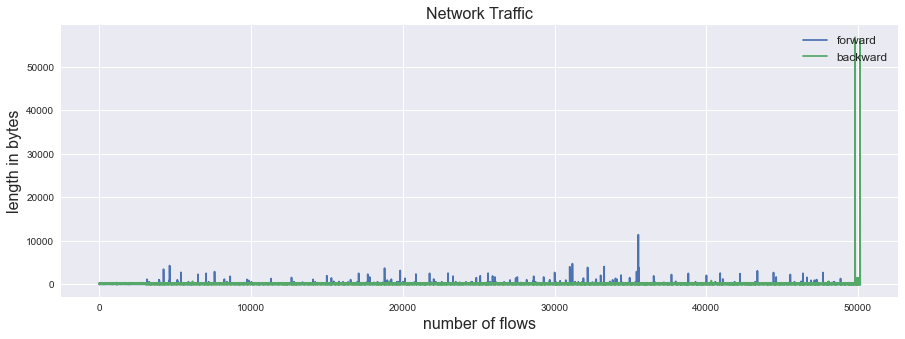

In [10]:
# plot total length of forward and backward flow in network traffic
#X_network_length_flow = X_network_length_flow_norm
X_network_length_flow = X_total_length_flow[np.where(X_total_length_flow[:,2] == 'Network')]
print(X_network_length_flow)
flow = ['forward','backward']

fig, ax = plt.subplots(figsize=(15,5))
for i in range(2):
    plt.plot(X_network_length_flow[:,i],label= flow[i])
    
plt.ylabel('length in bytes',fontsize=16)
plt.xlabel('number of flows',fontsize=16)
plt.title('Network Traffic',fontsize=16)
legend = plt.legend(loc='upper right',fontsize=12 ,shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

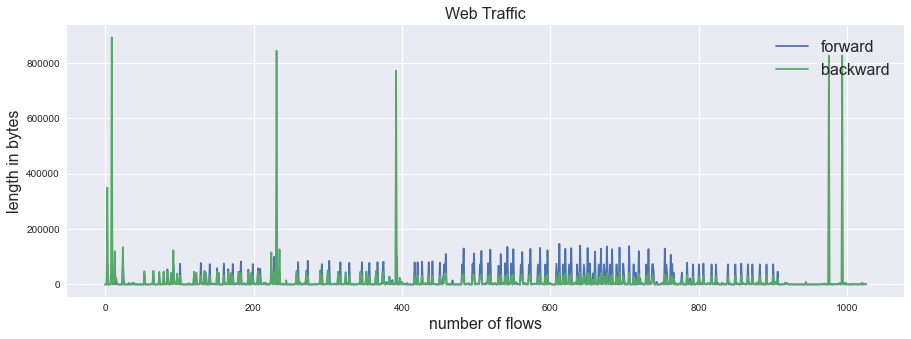

In [11]:
# plot total length of forward and backward flow in web traffic
X_web_length_flow = X_total_length_flow[np.where(X_total_length_flow[:,2] == 'Web')]
fig, ax = plt.subplots(figsize=(15,5))
for i in range(2):
    plt.plot(X_web_length_flow[:,i],label= flow[i])
    
plt.ylabel('length in bytes',fontsize=16)
plt.xlabel('number of flows',fontsize=16)
plt.title('Web Traffic',fontsize=16)
legend = plt.legend(loc='upper right',fontsize=16 ,shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

### Reserved IP address space
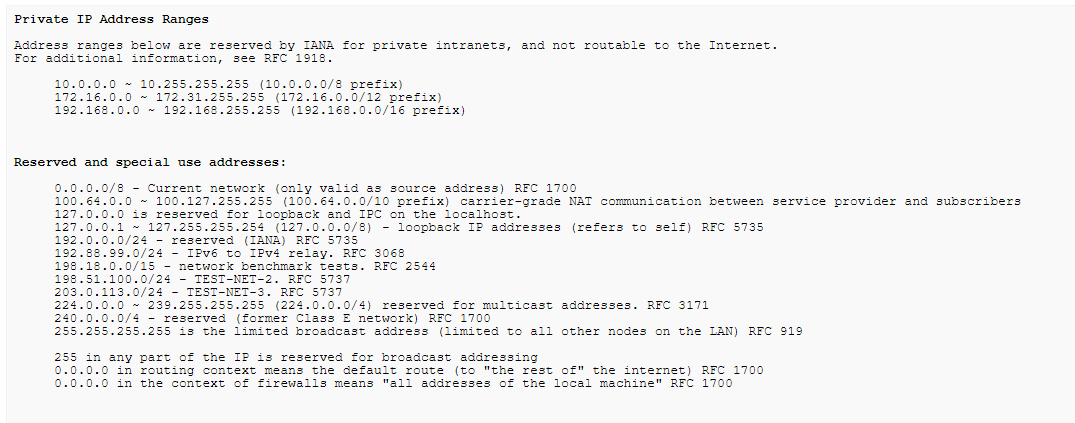

In [109]:
# Analayzing the network at social level - Popularity of hosts
x_src_ip_port = X_five_tuples[:,:2]
X_dst_ip_port = X_five_tuples[:,2:4]
# remove all reserved ip
reserved_ip = ['0.0.0.0','239.255.255.250','255.255.255.255','224.0.0.252','10.0.2.15','224.0.0.251']
X_src_des_ip_remove = X_src_dst_IP[np.where((X_src_dst_IP[:,0] != '0.0.0.0') & (X_src_dst_IP[:,1] != '0.0.0.0') &
                                           (X_src_dst_IP[:,0] != '255.255.255.255') & (X_src_dst_IP[:,1] != '255.255.255.255')&
                                           (X_src_dst_IP[:,0] != '224.0.0.252') & (X_src_dst_IP[:,1] != '224.0.0.252')&
                                           (X_src_dst_IP[:,0] != '239.255.255.250') & (X_src_dst_IP[:,1] != '239.255.255.250')&
                                           (X_src_dst_IP[:,0] != '224.0.0.251') & (X_src_dst_IP[:,1] != '224.0.0.251')&
                                           (X_src_dst_IP[:,0] != '10.0.2.15') & (X_src_dst_IP[:,1] != '10.0.2.15'))]
#10.0.2.15                                 
count, unique = np.unique(X_src_des_ip_remove,return_counts=True)
unique = unique.reshape(unique.shape[0],1)
count = count.reshape(count.shape[0],1)
X_src_des_ip_count = np.concatenate((unique,count),axis=1)
X_src_des_ip_count = X_src_des_ip_count[X_src_des_ip_count[:,0].argsort()]
print(X_src_des_ip_remove.shape)

(10183, 2)


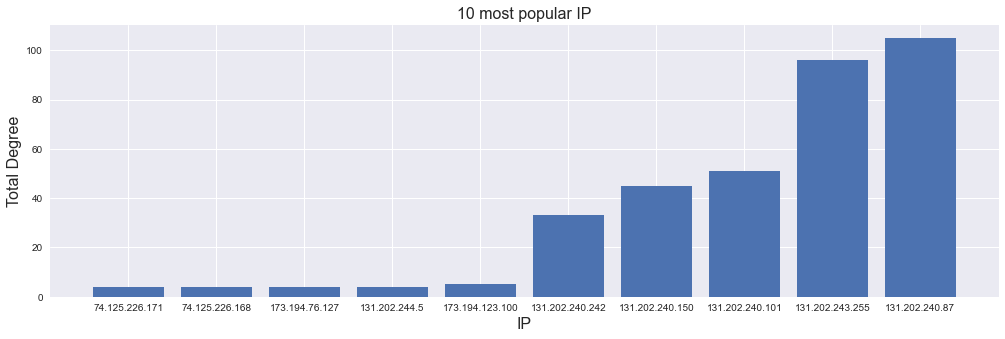

[[4 2 2 4 '74.125.226.171']
 [45 2 2 4 '74.125.226.168']
 [103 2 2 4 '173.194.76.127']
 [4780 4 0 4 '131.202.244.5']
 [16 4 1 5 '173.194.123.100']
 [100 11 22 33 '131.202.240.242']
 [3401 6 39 45 '131.202.240.150']
 [4703 5 46 51 '131.202.240.101']
 [1532 96 0 96 '131.202.243.255']
 [529 34 71 105 '131.202.240.87']]


In [110]:
graph = {}
for row in X_src_des_ip_remove:
    if row[0] not in graph:
        graph[row[0]] = {'in':set(),'out':set()}
        
    if row[1] not in graph[row[0]]['out']:
        graph[row[0]]['out'].add(row[1])
    
    if row[1] not in graph:
        graph[row[1]] = {'in':set(),'out':set()}
    
    if row[0] not in graph[row[1]]['in']:
        graph[row[1]]['in'].add(row[0])

X_src_des_degree_count = []
for row in X_src_des_ip_count:
    if row[1] in graph:
        r = np.insert(row,1,len(graph[row[1]]['in']))
        r = np.insert(r,2,len(graph[row[1]]['out']))
        r = np.insert(r,3,len(graph[row[1]]['in']) + len(graph[row[1]]['out']))
        X_src_des_degree_count.append(r)
        
# 0: occurrence, 1: in_degree, 2: out_degree, 3: total degree, 4: ip     
X_src_des_degree_count = np.array(X_src_des_degree_count)
# sort by total degree
X_src_des_degree_count = X_src_des_degree_count[X_src_des_degree_count[:,3].argsort()]
# sort by occurrence
X_src_des_occurrence_count = X_src_des_degree_count[X_src_des_degree_count[:,0].argsort()]

# dimension
degree_count_m = X_src_des_degree_count.shape[0]
degree_count_n = X_src_des_degree_count.shape[1]

# Get 10 most popular IPs
X_src_des_degree_count_10 = X_src_des_degree_count[degree_count_m - 10:]
fig, ax = plt.subplots(figsize=(17,5))
plt.bar(X_src_des_degree_count_10[:,4],X_src_des_degree_count_10[:,3],align='center')
plt.xlabel('IP',fontsize=16)
plt.ylabel('Total Degree',fontsize=16)
plt.title('10 most popular IP',fontsize=16)
plt.show()
print(X_src_des_degree_count_10)

[[149 1 2 3 '131.202.240.183']
 [257 4 2 6 '173.194.207.127']
 [391 4 0 4 '131.202.6.3']
 [452 9 47 56 '10.0.2.15']
 [529 34 71 105 '131.202.240.87']
 [1532 96 0 96 '131.202.243.255']
 [2118 4 0 4 '131.202.244.3']
 [3401 6 39 45 '131.202.240.150']
 [4703 5 46 51 '131.202.240.101']
 [4780 4 0 4 '131.202.244.5']]


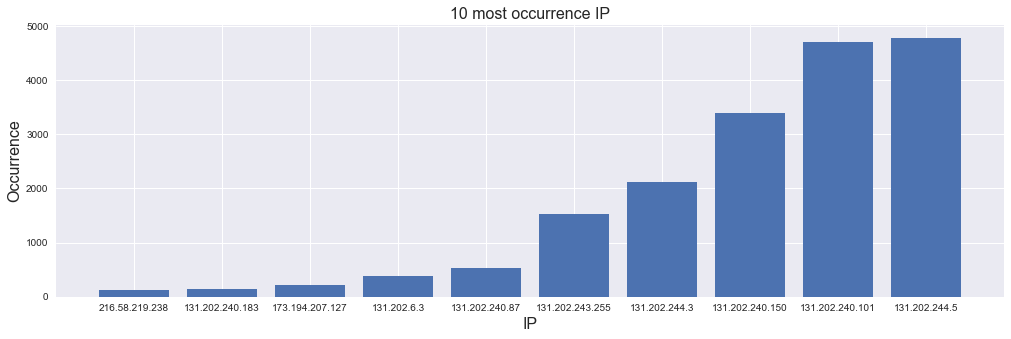

In [111]:
print(X_src_des_occurrence_count_10)
X_src_des_occurrence_count_10 = X_src_des_occurrence_count[degree_count_m-10:]
fig, ax = plt.subplots(figsize=(17,5))
plt.bar(X_src_des_occurrence_count_10[:,4],X_src_des_occurrence_count_10[:,0],align='center')
plt.xlabel('IP',fontsize=16)
plt.ylabel('Occurrence',fontsize=16)
plt.title('10 most occurrence IP',fontsize=16)
plt.show()

In [112]:
# show category counts with 10 most popular IP
ips = X_src_des_degree_count_10[:,4]
for ip in ips:
    a = X_ip_label[np.where((X_ip_label[:,0] == ip) | (X_ip_label[:,1] == ip))]
    a_category,counts = np.unique(a[:,4],return_counts=True)
    total = np.sum(counts)
    longest_length = max(len(x) for x in a_category)
    print("Category count with IP = {}".format(ip))
    for i in range(len(counts)):
        print("{}: {:{pad}} {}%".format(a_category[i],counts[i],round((counts[i] / total) * 100,2),pad=longest_length-len(a_category[i])+5))
    print()
    

Category count with IP = 74.125.226.171
Unknown:     4 100.0%

Category count with IP = 74.125.226.168
Google:     18 30.0%
Unknown:    42 70.0%

Category count with IP = 173.194.76.127
GoogleHangoutDuo:    99 96.12%
Unknown:              4 3.88%

Category count with IP = 131.202.244.5
Cybersec:        2 0.04%
GMail:          67 1.4%
Google:       2613 54.55%
GooglePlus:   2000 41.75%
Microsoft:       3 0.06%
Skype_Teams:     6 0.13%
Unknown:        99 2.07%

Category count with IP = 173.194.123.100
Google:     14 70.0%
Unknown:     6 30.0%

Category count with IP = 131.202.240.242
GMail:       8 0.75%
Google:     19 1.79%
SMBv1:       2 0.19%
Unknown:  1033 97.27%

Category count with IP = 131.202.240.150
GMail:              115 3.35%
Google:            1666 48.57%
GoogleHangoutDuo:   112 3.27%
GooglePlus:        1242 36.21%
SMBv1:               21 0.61%
SMBv23:               1 0.03%
Skype_Teams:          2 0.06%
Skype_TeamsCall:      1 0.03%
Unknown:            270 7.87%

Category co

In [113]:
# show category counts with 10 most occurrence IP
ips = X_src_des_occurrence_count_10[:,4]
for ip in ips:
    a = X_ip_label[np.where((X_ip_label[:,0] == ip) | (X_ip_label[:,1] == ip))]
    a_category,counts = np.unique(a[:,4],return_counts=True)
    total = np.sum(counts)
    longest_length = max(len(x) for x in a_category)
    print("Category count with IP = {}".format(ip))
    for i in range(len(counts)):
        print("{}: {:{pad}} {}%".format(a_category[i],counts[i],round((counts[i] / total) * 100,2),pad=longest_length-len(a_category[i])+5))
    print()

Category count with IP = 216.58.219.238
Google:        51 41.13%
GooglePlus:    20 16.13%
Unknown:       53 42.74%

Category count with IP = 131.202.240.183
Unknown:   276 100.0%

Category count with IP = 173.194.207.127
GoogleHangoutDuo:   257 100.0%

Category count with IP = 131.202.6.3
Cybersec:       2 0.51%
GMail:         13 3.32%
Google:       234 59.85%
GooglePlus:   130 33.25%
Microsoft:      1 0.26%
Unknown:       11 2.81%

Category count with IP = 131.202.240.87
Cybersec:            14 1.52%
GMail:               10 1.09%
Google:             117 12.7%
GoogleHangoutDuo:    28 3.04%
GooglePlus:           5 0.54%
Microsoft:           12 1.3%
Unknown:            731 79.37%
YouTube:              4 0.43%

Category count with IP = 131.202.243.255
SMBv1:      80 5.22%
Unknown:  1452 94.78%

Category count with IP = 131.202.244.3
Cybersec:       8 0.38%
GMail:         36 1.7%
Google:      1188 56.09%
GooglePlus:   844 39.85%
Microsoft:      4 0.19%
Unknown:       34 1.61%
YouTube:     

In [92]:
a = X_ip_label[np.where((X_ip_label[:,0] == '131.202.240.150') | (X_ip_label[:,1] == '131.202.240.150'))]
a1 = a[:,:2]
for ip in np.unique(a1):
    if not ip.startswith('131.202'):
        print(ip)

137.116.224.167
173.194.123.100
173.194.123.103
173.194.123.104
173.194.123.105
173.194.123.110
173.194.123.117
173.194.123.118
173.194.123.124
173.194.123.72
173.194.123.96
173.194.123.97
173.194.123.98
173.194.123.99
173.194.204.189
173.194.207.127
173.194.76.127
216.58.217.142
216.58.219.193
216.58.219.206
216.58.219.225
216.58.219.227
216.58.219.229
216.58.219.230
216.58.219.237
216.58.219.238
216.58.221.3
224.0.0.251
239.255.255.250
64.233.171.188
64.233.171.189
74.125.136.94
74.125.226.22
74.125.226.3
74.125.227.248
